<a href="https://colab.research.google.com/github/Hugo-Ormond/Projetos/blob/main/ProjetoDeepLearning_HugoOrmond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conectando o drive e importando os pacotes utilizados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from cv2 import resize

from glob import glob

from  keras.utils import to_categorical
import numpy as np

from sklearn.model_selection import train_test_split

from keras.models import Sequential,load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

from keras.regularizers import L1, L2, L1L2

from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.utils import Sequence

#Teste para uma imagem

In [ ]:
imagem_teste = img.imread('/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (263).jpg')

In [ ]:
imagem_teste

array([[[108, 108, 108],
        [ 42,  42,  42],
        [ 15,  15,  15],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  5,   5,   5]],

       [[106, 106, 106],
        [ 40,  40,  40],
        [ 14,  14,  14],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  5,   5,   5]],

       [[104, 104, 104],
        [ 41,  41,  41],
        [ 14,  14,  14],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  5,   5,   5]],

       ...,

       [[  4,   4,   4],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  5,   5,   5]],

       [[  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  5,   5,   5]],

       [[ 40,  40,  40],
        [ 39,  39,  39],
        [ 40,  40,  40],
        ...,
        [ 39,  39,  39],
        [ 34,  34,  34],
        [ 48,  48,  48]]

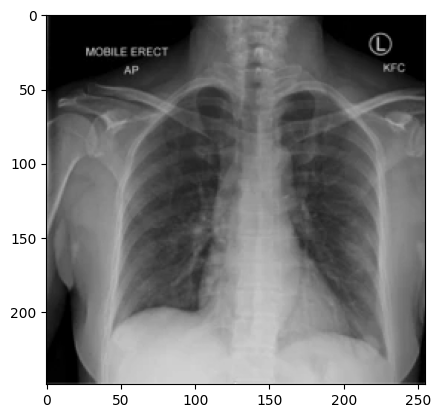

In [ ]:
plt.imshow(imagem_teste)

In [ ]:
imagem_teste.shape

(249, 255, 3)

Com redimensionamento

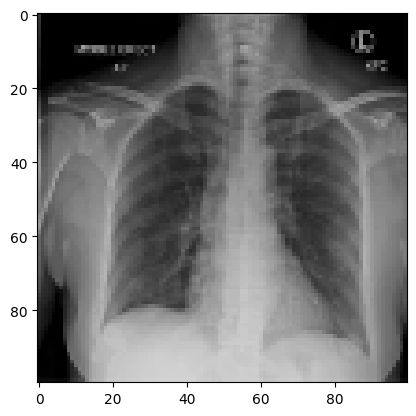

In [ ]:
plt.imshow(resize(imagem_teste,(100,100)))

Com redimensionamento e normalização

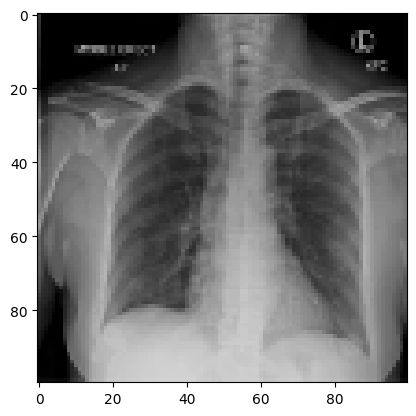

In [ ]:
plt.imshow(resize(imagem_teste,(100,100))/255)

#Realizando a importação das imagens com glob

Criando função para ler a imagem, redimencionar e normalizar

In [ ]:
def importaimagens(caminho,tamanho, normalizacao=True):
  if normalizacao == True:
    divisor = 255
  else:
    divisor = 1
  return resize(img.imread(caminho),tamanho)/divisor

In [ ]:
glob('/content/drive/MyDrive/Projeto/*')

['/content/drive/MyDrive/Projeto/COVID-19',
 '/content/drive/MyDrive/Projeto/Normal',
 '/content/drive/MyDrive/Projeto/Pneumonia-Viral',
 '/content/drive/MyDrive/Projeto/Pneumonia-Bacterial']

In [ ]:
glob('/content/drive/MyDrive/Projeto/COVID-19/*.jpg')

['/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1255).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1257).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1258).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (125).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1254).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1253).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1248).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1250).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1260).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1244).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (127).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1259).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (126).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1252).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/COVID-19 (1265).jpg',
 '/content/drive/MyDrive/Projeto/COVID-19/C

Função para categorização

In [ ]:
def numerarcategorias(categorias):
  if categorias.split('/')[-1] == 'Pneumonia-Bacterial':
    return 0
  elif categorias.split('/')[-1] == 'Pneumonia-Viral':
    return 1
  elif categorias.split('/')[-1] == 'COVID-19':
    return 2
  elif categorias.split('/')[-1] == 'Normal':
    return 3

Função para importação em massa - Tamanho escolhido (100x100)

In [ ]:
lista_imagens=[]
lista_categorias=[]

for pasta in glob('/content/drive/MyDrive/Projeto/*'):
  categorias = glob(pasta)
  for categoria in categorias:
    imagens = glob(categoria + '/*.jpg')
    for imagem in imagens:
       lista_imagens.append(importaimagens(imagem,(100,100)))
       lista_categorias.append(to_categorical(int(numerarcategorias(categoria)),4))
lista_imagens = np.array(lista_imagens)
lista_categorias = np.array(lista_categorias)

#Dividindo dados de treino e teste

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(lista_imagens,lista_categorias, train_size=.7, stratify=lista_categorias)

In [ ]:
np.unique([np.argmax(i) for i in y_treino], return_counts=True) #conferindo a divisão entre treino e teste

(array([0, 1, 2, 3]), array([2100, 1159,  897, 2289]))

#1º Modelo - Mais simples, 1 camada conv e uma de maxpool. Imagem 100x100

In [ ]:
modelo = Sequential()
modelo.add(Conv2D(input_shape=(100,100,3), filters=10, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
modelo.add(MaxPool2D(pool_size=(2,2)))
modelo.add(Flatten())
modelo.add(Dense(units=4, activation='softmax'))

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 10)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 25000)             0         
                                                                 
 dense (Dense)               (None, 4)                 100004    
                                                                 
Total params: 100284 (391.73 KB)
Trainable params: 100284 (391.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelo.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
modelfinal = modelo.fit(x_treino,y_treino, validation_data=(x_teste,y_teste), epochs=50, batch_size=50)

Epoch 1/50
129/129 [==============================] - 15s 28ms/step - loss: 1.0836 - accuracy: 0.6473 - val_loss: 0.5355 - val_accuracy: 0.7930
Epoch 2/50
129/129 [==============================] - 2s 12ms/step - loss: 0.4903 - accuracy: 0.8068 - val_loss: 0.4332 - val_accuracy: 0.8274
Epoch 3/50
129/129 [==============================] - 1s 11ms/step - loss: 0.4154 - accuracy: 0.8292 - val_loss: 0.4342 - val_accuracy: 0.8241
Epoch 4/50
129/129 [==============================] - 2s 14ms/step - loss: 0.3714 - accuracy: 0.8467 - val_loss: 0.3937 - val_accuracy: 0.8360
Epoch 5/50
129/129 [==============================] - 2s 13ms/step - loss: 0.3381 - accuracy: 0.8624 - val_loss: 0.4018 - val_accuracy: 0.8379
Epoch 6/50
129/129 [==============================] - 2s 15ms/step - loss: 0.3115 - accuracy: 0.8715 - val_loss: 0.3792 - val_accuracy: 0.8440
Epoch 7/50
129/129 [==============================] - 2s 14ms/step - loss: 0.2834 - accuracy: 0.8838 - val_loss: 0.3993 - val_accuracy: 0.838

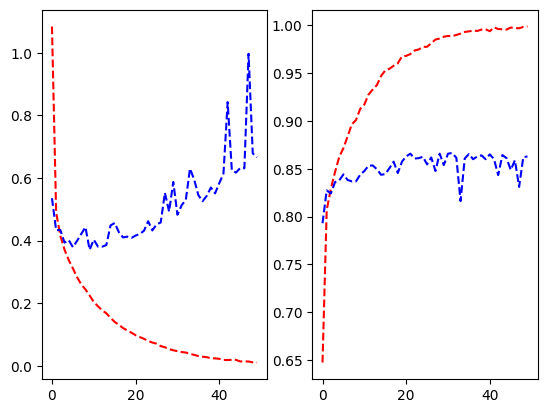

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(modelfinal.history['loss'], 'r--')
ax1.plot(modelfinal.history['val_loss'], 'b--')

ax2.plot(modelfinal.history['accuracy'], 'r--')
ax2.plot(modelfinal.history['val_accuracy'], 'b--')

Performance Intraclasse

In [ ]:
comp = pd.DataFrame(data={'real':np.argmax(y_teste,axis=1),
                   'prev':np.argmax(modelo.predict(x_teste), axis=1),
                          'cont':[1 for i in range(len(y_teste))]})

87/87 [==============================] - 1s 4ms/step


In [ ]:
comp.pivot_table(index='real',columns='prev',values='cont',aggfunc='sum').fillna(0)

prev,0,1,2,3
real,,,,
0,754,123,4,20
1,178,303,4,12
2,4,1,378,1
3,9,17,6,949


In [ ]:
comp.pivot_table(index='real',columns='prev',values='cont',aggfunc='sum').fillna(0).sum(axis=1).T

real
0    901
1    497
2    384
3    981
dtype: int64

#2º Modelo - Mais simples, 1 camada conv e uma de maxpool. Diminuindo tamanho da imagem. Imagem 64x64

Por análise do modelo um foi possível verificar que o mesmo alcançou "overfitou" muito cedo, com isso podemos testar a diminuição do tamanho da imagem, aliviando também a RAM necessária para processamento.

In [ ]:
lista_imagens=[]
lista_categorias=[]

for pasta in glob('/content/drive/MyDrive/Projeto/*'):
  categorias = glob(pasta)
  for categoria in categorias:
    imagens = glob(categoria + '/*.jpg')
    for imagem in imagens:
       lista_imagens.append(importaimagens(imagem,(64,64)))
       lista_categorias.append(to_categorical(int(numerarcategorias(categoria)),4))
lista_imagens = np.array(lista_imagens)
lista_categorias = np.array(lista_categorias)

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(lista_imagens,lista_categorias, train_size=.7, stratify=lista_categorias)

In [ ]:
modelo2 = Sequential()
modelo2.add(Conv2D(input_shape=(64,64,3), filters=10, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
modelo2.add(MaxPool2D(pool_size=(2,2)))
modelo2.add(Flatten())
modelo2.add(Dense(units=4, activation='softmax'))

modelo2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 10)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 10)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10240)             0         
                                                                 
 dense (Dense)               (None, 4)                 40964     
                                                                 
Total params: 41244 (161.11 KB)
Trainable params: 41244 (161.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelo2.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
modelfinal2 = modelo2.fit(x_treino,y_treino, validation_data=(x_teste,y_teste), epochs=50, batch_size=50)

Epoch 1/50
129/129 [==============================] - 12s 17ms/step - loss: 0.9157 - accuracy: 0.6464 - val_loss: 0.5782 - val_accuracy: 0.7850
Epoch 2/50
129/129 [==============================] - 1s 9ms/step - loss: 0.5574 - accuracy: 0.7831 - val_loss: 0.4815 - val_accuracy: 0.8060
Epoch 3/50
129/129 [==============================] - 1s 8ms/step - loss: 0.4740 - accuracy: 0.8115 - val_loss: 0.4368 - val_accuracy: 0.8198
Epoch 4/50
129/129 [==============================] - 1s 9ms/step - loss: 0.4385 - accuracy: 0.8247 - val_loss: 0.4217 - val_accuracy: 0.8205
Epoch 5/50
129/129 [==============================] - 1s 8ms/step - loss: 0.4063 - accuracy: 0.8329 - val_loss: 0.4013 - val_accuracy: 0.8281
Epoch 6/50
129/129 [==============================] - 1s 7ms/step - loss: 0.3800 - accuracy: 0.8399 - val_loss: 0.3919 - val_accuracy: 0.8263
Epoch 7/50
129/129 [==============================] - 1s 7ms/step - loss: 0.3612 - accuracy: 0.8535 - val_loss: 0.3810 - val_accuracy: 0.8317
Epoc

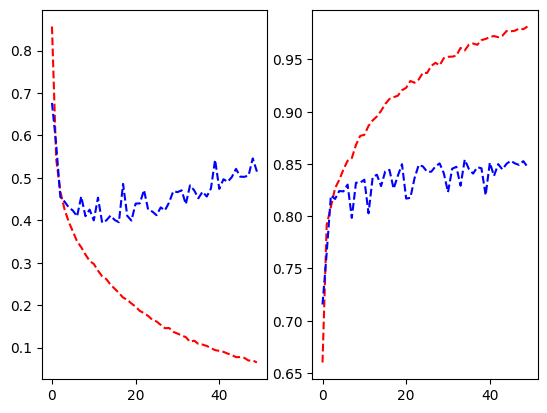

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(modelfinal2.history['loss'], 'r--')
ax1.plot(modelfinal2.history['val_loss'], 'b--')

ax2.plot(modelfinal2.history['accuracy'], 'r--')
ax2.plot(modelfinal2.history['val_accuracy'], 'b--')

In [ ]:
comp = pd.DataFrame(data={'real':np.argmax(y_teste,axis=1),
                   'prev':np.argmax(modelo2.predict(x_teste), axis=1),
                          'cont':[1 for i in range(len(y_teste))]})

87/87 [==============================] - 0s 3ms/step


In [ ]:
comp.pivot_table(index='real',columns='prev',values='cont',aggfunc='sum').fillna(0)

prev,0,1,2,3
real,,,,
0,717,168,2,14
1,152,316,5,24
2,3,6,372,3
3,16,26,3,936


In [ ]:
comp.pivot_table(index='real',columns='prev',values='cont',aggfunc='sum').fillna(0).sum(axis=1).T

real
0    901
1    497
2    384
3    981
dtype: int64

#3º Modelo - Mais complexo, 2 camadas conv e 2 maxpool. Imagem 64x64.

In [ ]:
modelo3 = Sequential()
modelo3.add(Conv2D(input_shape=(64,64,3), filters=10, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
modelo3.add(MaxPool2D(pool_size=(2,2)))
modelo3.add(Conv2D(input_shape=(32,32,3), filters=10, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
modelo3.add(MaxPool2D(pool_size=(2,2)))
modelo3.add(Flatten())
modelo3.add(Dense(units=4, activation='softmax'))

modelo3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 10)        280       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 10)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2560)              0         
                                                                 
 dense_5 (Dense)             (None, 4)                

In [ ]:
modelo3.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
modelfinal3 = modelo3.fit(x_treino,y_treino, validation_data=(x_teste,y_teste), epochs=50, batch_size=50)

Epoch 1/50
129/129 [==============================] - 3s 14ms/step - loss: 0.8482 - accuracy: 0.6489 - val_loss: 0.6795 - val_accuracy: 0.7524
Epoch 2/50
129/129 [==============================] - 1s 8ms/step - loss: 0.5354 - accuracy: 0.7843 - val_loss: 0.5690 - val_accuracy: 0.7742
Epoch 3/50
129/129 [==============================] - 1s 8ms/step - loss: 0.4708 - accuracy: 0.8031 - val_loss: 0.4971 - val_accuracy: 0.8009
Epoch 4/50
129/129 [==============================] - 1s 9ms/step - loss: 0.4431 - accuracy: 0.8109 - val_loss: 0.4727 - val_accuracy: 0.8067
Epoch 5/50
129/129 [==============================] - 1s 9ms/step - loss: 0.4225 - accuracy: 0.8219 - val_loss: 0.4481 - val_accuracy: 0.8122
Epoch 6/50
129/129 [==============================] - 1s 9ms/step - loss: 0.4119 - accuracy: 0.8244 - val_loss: 0.4370 - val_accuracy: 0.8147
Epoch 7/50
129/129 [==============================] - 1s 9ms/step - loss: 0.3940 - accuracy: 0.8317 - val_loss: 0.4391 - val_accuracy: 0.8227
Epoch

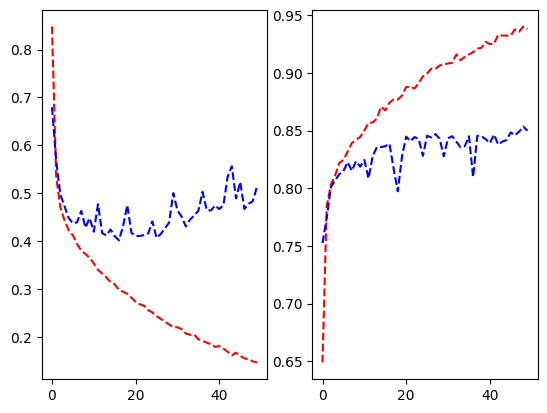

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(modelfinal3.history['loss'], 'r--')
ax1.plot(modelfinal3.history['val_loss'], 'b--')

ax2.plot(modelfinal3.history['accuracy'], 'r--')
ax2.plot(modelfinal3.history['val_accuracy'], 'b--')

In [ ]:
comp = pd.DataFrame(data={'real':np.argmax(y_teste,axis=1),
                   'prev':np.argmax(modelo3.predict(x_teste), axis=1),
                          'cont':[1 for i in range(len(y_teste))]})

87/87 [==============================] - 0s 4ms/step


In [ ]:
comp.pivot_table(index='real',columns='prev',values='cont',aggfunc='sum').fillna(0)

prev,0,1,2,3
real,,,,
0,786,91,3,21
1,225,238,6,28
2,3,4,375,2
3,12,15,5,949


In [ ]:
comp.pivot_table(index='real',columns='prev',values='cont',aggfunc='sum').fillna(0).sum(axis=1).T

real
0    901
1    497
2    384
3    981
dtype: int64

#4º Modelo - Mais simples, 1 conv e 1 maxpool. Inlcuindo camada de dropout e regularização. Imagem 64x64

Regularização

In [ ]:
modelo4 = Sequential()
modelo4.add(Conv2D(input_shape=(64,64,3), filters=10, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', kernel_regularizer=L1L2()))
modelo4.add(MaxPool2D(pool_size=(2,2)))
modelo4.add(Flatten())
modelo4.add(Dropout(0.5))
modelo4.add(Dense(units=4, activation='softmax'))

modelo4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 10)        280       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 32, 32, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 10240)             0         
                                                                 
 dropout_3 (Dropout)         (None, 10240)             0         
                                                                 
 dense_9 (Dense)             (None, 4)                 40964     
                                                                 
Total params: 41244 (161.11 KB)
Trainable params: 41244 (161.11 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
modelo4.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
modelfinal4 = modelo4.fit(x_treino,y_treino, validation_data=(x_teste,y_teste), epochs=50, batch_size=50)

Epoch 1/50
129/129 [==============================] - 3s 11ms/step - loss: 0.9305 - accuracy: 0.6290 - val_loss: 0.5790 - val_accuracy: 0.7850
Epoch 2/50
129/129 [==============================] - 1s 9ms/step - loss: 0.5466 - accuracy: 0.7893 - val_loss: 0.4975 - val_accuracy: 0.8075
Epoch 3/50
129/129 [==============================] - 1s 8ms/step - loss: 0.4686 - accuracy: 0.8123 - val_loss: 0.4602 - val_accuracy: 0.8136
Epoch 4/50
129/129 [==============================] - 1s 8ms/step - loss: 0.4263 - accuracy: 0.8261 - val_loss: 0.4585 - val_accuracy: 0.8118
Epoch 5/50
129/129 [==============================] - 1s 8ms/step - loss: 0.4079 - accuracy: 0.8309 - val_loss: 0.4279 - val_accuracy: 0.8263
Epoch 6/50
129/129 [==============================] - 1s 7ms/step - loss: 0.3889 - accuracy: 0.8349 - val_loss: 0.4543 - val_accuracy: 0.8093
Epoch 7/50
129/129 [==============================] - 1s 9ms/step - loss: 0.3804 - accuracy: 0.8416 - val_loss: 0.4220 - val_accuracy: 0.8256
Epoch

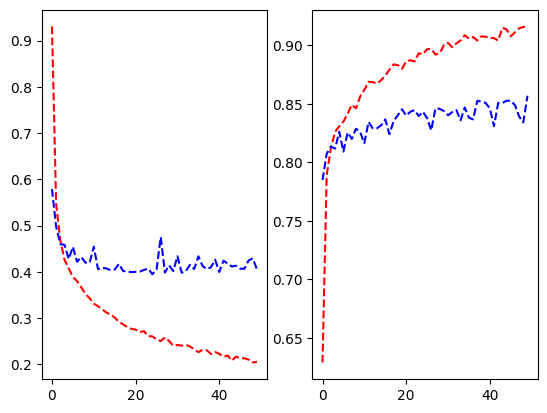

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(modelfinal4.history['loss'], 'r--')
ax1.plot(modelfinal4.history['val_loss'], 'b--')

ax2.plot(modelfinal4.history['accuracy'], 'r--')
ax2.plot(modelfinal4.history['val_accuracy'], 'b--')

In [ ]:
comp = pd.DataFrame(data={'real':np.argmax(y_teste,axis=1),
                   'prev':np.argmax(modelo4.predict(x_teste), axis=1),
                          'cont':[1 for i in range(len(y_teste))]})

87/87 [==============================] - 0s 2ms/step


In [ ]:
comp.pivot_table(index='real',columns='prev',values='cont',aggfunc='sum').fillna(0)

prev,0,1,2,3
real,,,,
0,780,99,2,20
1,200,263,9,25
2,4,4,373,3
3,9,18,2,952


In [ ]:
comp.pivot_table(index='real',columns='prev',values='cont',aggfunc='sum').fillna(0).sum(axis=1).T

real
0    901
1    497
2    384
3    981
dtype: int64

#5º Modelo - Transfer Learning com trainable = False e utilizando gerador para acessar apenas imagens utilizadas em cada batch. Imagem 64x64

In [ ]:
vgg = VGG16(include_top=False, input_shape=(64,64,3))

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
def importaimagens(caminho,tamanho):
  return resize(img.imread(caminho),tamanho)

In [ ]:
lista_imagens=[]
lista_categorias=[]

for pasta in glob('/content/drive/MyDrive/Projeto/*'):
  categorias = glob(pasta)
  for categoria in categorias:
    imagens = glob(categoria + '/*.jpg')
    for imagem in imagens:
       lista_imagens.append(imagem)
       lista_categorias.append(to_categorical(int(numerarcategorias(categoria)),4))
lista_imagens = np.array(lista_imagens)
lista_categorias = np.array(lista_categorias)

In [ ]:
lista_imagens.shape

(9208,)

Criando gerador de sequencias para facilitar e melhorar uso de memoria

In [ ]:
class GeradorSeq(Sequence):

  def __init__(self, x, y, batch_size):
    self.x = x
    self.y = y
    self.batch_size = batch_size

  def __len__(self):
    return len(self.x) // self.batch_size

  def __getitem__(self, indice):
    low = indice * self.batch_size
    high = min(low + self.batch_size, len(self.x))

    lista_imagens_batch = []
    batch_x = self.x[low:high]
    for imagem in batch_x:
      lista_imagens_batch.append(preprocess_input(importaimagens(imagem,(64,64))))


    batch_y = self.y[low:high]

    return np.array(lista_imagens_batch), batch_y

Juntar as pontas para criar o modelo com base no VGG - congelando a parte anterior / pesos congelados

In [ ]:
vgg.trainable = False

In [ ]:
modelo5 = Sequential()
modelo5.add(modelo)
modelo5.add(Flatten())
modelo5.add(Dense(units=4, activation='softmax'))

In [ ]:
modelo5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 14722884 (56.16 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
modelo5.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
gerador = GeradorSeq(lista_imagens,lista_categorias,50)

In [ ]:
modelo5.fit(gerador,epochs=20,batch_size=50)

Epoch 1/20
184/184 [==============================] - 171s 922ms/step - loss: 6.9865 - accuracy: 0.6565
Epoch 2/20
184/184 [==============================] - 175s 953ms/step - loss: 4.0856 - accuracy: 0.7438
Epoch 3/20
184/184 [==============================] - 169s 916ms/step - loss: 3.5337 - accuracy: 0.7777
Epoch 4/20
184/184 [==============================] - 173s 940ms/step - loss: 3.6600 - accuracy: 0.7568
Epoch 5/20
184/184 [==============================] - 170s 927ms/step - loss: 3.5331 - accuracy: 0.7617
Epoch 6/20
184/184 [==============================] - 170s 923ms/step - loss: 3.3879 - accuracy: 0.7687
Epoch 7/20
184/184 [==============================] - 171s 923ms/step - loss: 3.3243 - accuracy: 0.7748
Epoch 8/20
184/184 [==============================] - 171s 932ms/step - loss: 3.1591 - accuracy: 0.7704
Epoch 9/20
184/184 [==============================] - 171s 931ms/step - loss: 2.7389 - accuracy: 0.8059
Epoch 10/20
184/184 [==============================] - 173s 939m

#Conclusão e Resultados

  Podemos concluir que o desempenho dos modelos testados foi similar, até por isso eu optaria por escolher a estrutura mais simples, realizada no modelo 2, aplicando early stop próximo a 5ª época, onde as métricas começam a overfittar. Com isso o modelo escolhido alcançou uma acurácia de aproximadamente 82%. Vale ressaltar que o modelo obteve um desempenho muito bom com identificações das categorias 2 e 3 (pulmão com COVID e Normal), tendo maior dificuldade em identificar as categorias 0 e 1 (Pneumonia bacterial e viral), principalmente na 1, onde a acurácia chega a ser próxima ou inferior a 50%, como pode ser visto na análise abaixo:

In [ ]:
modelescolhido = Sequential()
modelescolhido.add(Conv2D(input_shape=(64,64,3), filters=10, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
modelescolhido.add(MaxPool2D(pool_size=(2,2)))
modelescolhido.add(Flatten())
modelescolhido.add(Dense(units=4, activation='softmax'))

modelescolhido.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 10)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10240)             0         
                                                                 
 dense_1 (Dense)             (None, 4)                 40964     
                                                                 
Total params: 41244 (161.11 KB)
Trainable params: 41244 (161.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelescolhido.compile(loss='categorical_crossentropy', metrics='accuracy')
modelescolhido.fit(x_treino,y_treino, validation_data=(x_teste,y_teste), epochs=5, batch_size=50)

Epoch 1/5
129/129 [==============================] - 2s 11ms/step - loss: 0.7506 - accuracy: 0.7035 - val_loss: 0.5325 - val_accuracy: 0.7879
Epoch 2/5
129/129 [==============================] - 1s 8ms/step - loss: 0.5037 - accuracy: 0.7997 - val_loss: 0.4501 - val_accuracy: 0.8122
Epoch 3/5
129/129 [==============================] - 1s 9ms/step - loss: 0.4493 - accuracy: 0.8180 - val_loss: 0.4243 - val_accuracy: 0.8194
Epoch 4/5
129/129 [==============================] - 1s 10ms/step - loss: 0.4091 - accuracy: 0.8337 - val_loss: 0.4203 - val_accuracy: 0.8230
Epoch 5/5
129/129 [==============================] - 1s 10ms/step - loss: 0.3854 - accuracy: 0.8403 - val_loss: 0.4025 - val_accuracy: 0.8266


In [ ]:
comp = pd.DataFrame(data={'real':np.argmax(y_teste,axis=1),
                   'prev':np.argmax(modelescolhido.predict(x_teste), axis=1),
                          'cont':[1 for i in range(len(y_teste))]})

comp.pivot_table(index='real',columns='prev',values='cont',aggfunc='sum').fillna(0)

87/87 [==============================] - 0s 3ms/step


prev,0,1,2,3
real,,,,
0,733.0,95.0,19.0,54.0
1,220.0,222.0,10.0,45.0
2,2.0,0.0,373.0,9.0
3,5.0,10.0,10.0,956.0


Note que ocorreu uma acurácia menor do que 50% na categoria 1 (Pneumonia Viral).

#Possíveis pontos de melhoria

Pode-se observar que a maior dificuldade do modelo foi em diversificar a Pneumonia entre viral e bacteriana. Com isso, acredito que um dos possíveis pontos de melhoria seria unificar a variável pneumonia em um primeiro momento, tendo apenas 3 categorias (Normal, Covid e Pneumonia), para posterior aplicação de um outro modelo, diferente e provavelmente mais complexo, para identificação do tipo de pneumonia. Outro ponto de melhoria seria testar outras estruturas de rede (apesar de ter sido feito algumas variações de rede e hiperparamentros, algumas dessas variações removidas e ocultadas da entrega final), como por exemplo a utilização da rede Inception v3 no transfer leraning.